# 1. **Manipulação do dataset**

**Importação do dataset.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dados-das-interfaces-1/H.dat
/kaggle/input/interfaces/heptane.dat
/kaggle/input/interfaces/light.dat
/kaggle/input/interfaces/toluene.dat
/kaggle/input/interfaces/heptol.dat
/kaggle/input/interfaces/medium.dat


In [2]:
df = pd.read_csv('../input/dados-das-interfaces-1/H.dat',sep="\s+")
df.columns = ['Interfaces', 'Propriedades','Fluidos','Valores']
#print(df)

In [3]:
df.axes

[RangeIndex(start=0, stop=29452, step=1),
 Index(['Interfaces', 'Propriedades', 'Fluidos', 'Valores'], dtype='object')]

**Quantidade de propriedades únicas no dataset.**

In [4]:
prop = df["Propriedades"].unique().tolist()
prop.sort()
print(len(prop))

840


**Quantidade de interfaces no dataset.**

In [5]:
interf = df["Interfaces"].unique().tolist()
print(len(interf))

119


**Obtendo a tabela de Propriedades X Interfaces.**

In [6]:
table = pd.pivot_table(data = df, index = ["Interfaces"], columns = ["Propriedades"])
#pd.set_option("display.max_rows", None, "display.max_columns", None)
table.shape

(118, 840)

In [7]:
df_ = pd.DataFrame(table)
#df.drop(['Interfaces'], axis=1)
df_.columns = prop
df_.head()



,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,AD.WHB.TOLUENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
Interfaces,,,,,,,,,,,,,,,,,,,,,
./heptane-brine/cl/mg/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031587,0.031537,-0.063124,-0.164861,NaN,4.426621,6.060110,6.150829,2.208128,2.208128
./heptane-brine/cl/na/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034179,0.030508,-0.064686,-0.156211,NaN,4.488218,6.117967,6.202394,2.268771,2.268771
./heptane-brine/cl/na/3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036342,0.030909,-0.067252,-0.158987,NaN,4.453946,6.089230,6.172434,2.247331,2.247331
./heptane-brine/cl/na/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.033264,-0.061190,-0.158171,NaN,4.456113,6.107592,6.196848,2.232335,2.232335
./heptane-brine/extended/3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031986,0.033664,-0.065649,-0.159591,NaN,4.470368,6.098434,6.181268,2.268069,2.268069


In [8]:
df_.shape

(118, 840)

In [9]:
df_.reset_index(level=0, inplace=True)
df_.shape

(118, 841)

In [10]:
df_.head()

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
0,./heptane-brine/cl/mg/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031587,0.031537,-0.063124,-0.164861,NaN,4.426621,6.060110,6.150829,2.208128,2.208128
1,./heptane-brine/cl/na/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034179,0.030508,-0.064686,-0.156211,NaN,4.488218,6.117967,6.202394,2.268771,2.268771
2,./heptane-brine/cl/na/3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036342,0.030909,-0.067252,-0.158987,NaN,4.453946,6.089230,6.172434,2.247331,2.247331
3,./heptane-brine/cl/na/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.033264,-0.061190,-0.158171,NaN,4.456113,6.107592,6.196848,2.232335,2.232335
4,./heptane-brine/extended/3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031986,0.033664,-0.065649,-0.159591,NaN,4.470368,6.098434,6.181268,2.268069,2.268069


**Clusterização das Interfaces**

In [11]:
tipos_interfaces = ["heptane","heptol","light","medium","toluene"]
l_interf = df_["Interfaces"]

def stringInList(str, lst):
    for i in range(len(lst)):
        if str in lst[i]:
            lst[i] = str
            
for i in range(len(tipos_interfaces)):
    
    stringInList(tipos_interfaces[i],l_interf)

df_["Interfaces"] = l_interf

df_.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
0,heptane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031587,0.031537,-0.063124,-0.164861,NaN,4.426621,6.060110,6.150829,2.208128,2.208128
1,heptane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.034179,0.030508,-0.064686,-0.156211,NaN,4.488218,6.117967,6.202394,2.268771,2.268771
2,heptane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036342,0.030909,-0.067252,-0.158987,NaN,4.453946,6.089230,6.172434,2.247331,2.247331
3,heptane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027927,0.033264,-0.061190,-0.158171,NaN,4.456113,6.107592,6.196848,2.232335,2.232335
4,heptane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031986,0.033664,-0.065649,-0.159591,NaN,4.470368,6.098434,6.181268,2.268069,2.268069


In [12]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 841 entries, Interfaces to WWHB.DAT
dtypes: float64(840), object(1)
memory usage: 775.4+ KB


In [13]:
df_.to_csv('mycsvfile.csv',index=False)

# 2.**Contrução dos gráficos**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

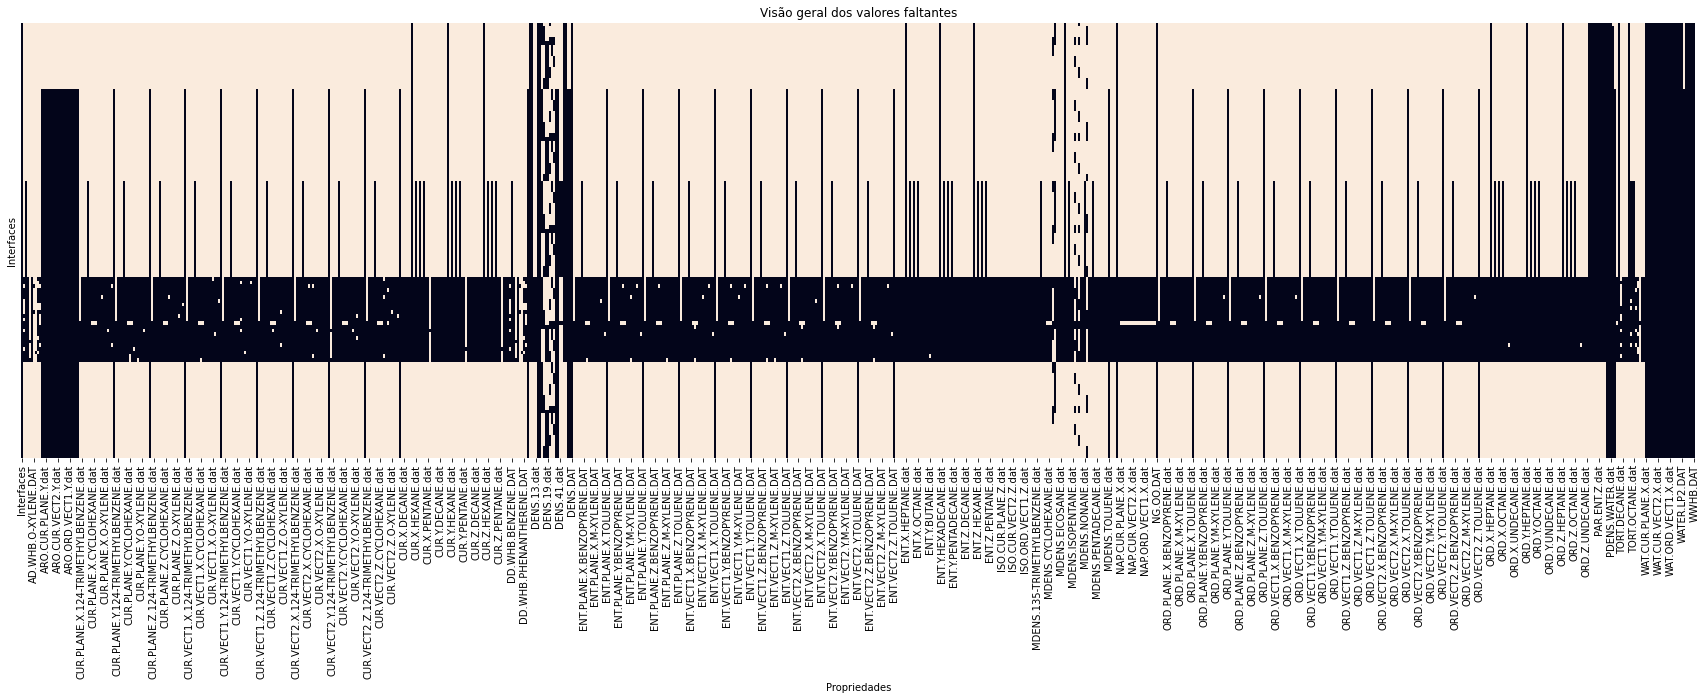

In [15]:
plt.figure(figsize = (30,8))

sns.heatmap(df_.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Propriedades')
plt.ylabel('Interfaces')
plt.show()

Text(0, 0.5, 'Interfaces')

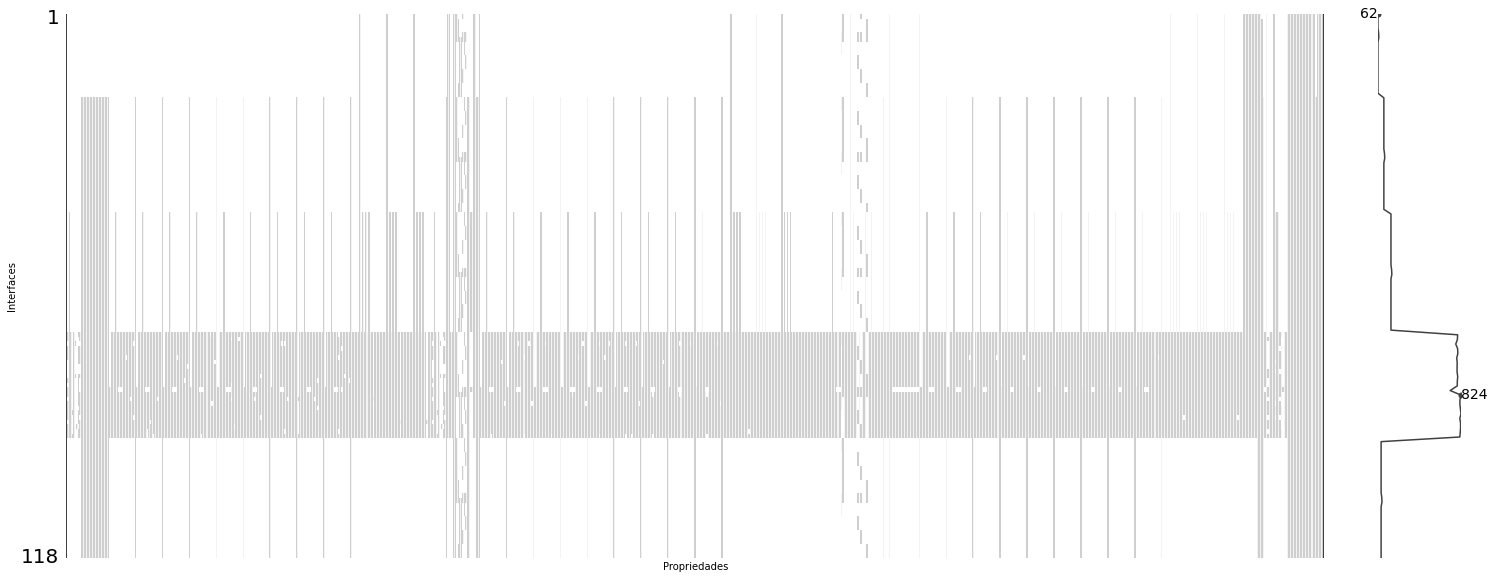

In [16]:
import missingno as msno

msno.matrix(df_)
plt.xlabel('Propriedades')
plt.ylabel('Interfaces')

In [17]:
dados = df_.iloc[:,-np.int(len(df_)*0.22):-1]
dados

,WAT.CUR.PLANE.X.dat,WAT.CUR.PLANE.Y.dat,WAT.CUR.PLANE.Z.dat,WAT.CUR.VECT1.X.dat,WAT.CUR.VECT1.Y.dat,WAT.CUR.VECT1.Z.dat,WAT.CUR.VECT2.X.dat,WAT.CUR.VECT2.Y.dat,WAT.CUR.VECT2.Z.dat,WAT.ORD.PLANE.X.dat,...,WAT.ORD.VECT1.Z.dat,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT
0,2.602159,2.594868,1.937246,2.227144,2.201664,2.247559,2.150800,2.123891,2.480981,-0.084591,...,-0.009642,0.031587,0.031537,-0.063124,-0.164861,NaN,4.426621,6.060110,6.150829,2.208128
1,2.570750,2.558761,1.927335,2.206399,2.181930,2.256866,2.161236,2.127988,2.532677,-0.080491,...,-0.007803,0.034179,0.030508,-0.064686,-0.156211,NaN,4.488218,6.117967,6.202394,2.268771
2,2.576212,2.561262,1.970509,2.167899,2.233995,2.251072,2.121897,2.161736,2.474109,-0.083154,...,-0.008951,0.036342,0.030909,-0.067252,-0.158987,NaN,4.453946,6.089230,6.172434,2.247331
3,2.588362,2.564111,1.944246,2.213533,2.229876,2.220461,2.151537,2.134657,2.521099,-0.080965,...,-0.005370,0.027927,0.033264,-0.061190,-0.158171,NaN,4.456113,6.107592,6.196848,2.232335
4,2.598918,2.586655,1.932047,2.225880,2.218060,2.256168,2.131329,2.113585,2.504907,-0.083915,...,-0.010122,0.031986,0.033664,-0.065649,-0.159591,NaN,4.470368,6.098434,6.181268,2.268069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2.417057,2.467728,1.969717,2.249165,2.245140,2.131150,2.168481,2.173733,2.375044,-0.051073,...,0.012710,0.019837,0.016447,-0.036284,-0.121344,0.125589,4.899444,5.949969,6.420843,2.337303
114,2.553785,2.540126,1.968276,2.230386,2.272329,2.218259,2.144769,2.128781,2.405369,-0.060550,...,0.002143,0.020345,0.022312,-0.042657,-0.129216,0.124244,4.895954,5.968419,6.457587,2.343356
115,2.473954,2.487097,1.984249,2.189294,2.212706,2.261038,2.152470,2.155623,2.368866,-0.058291,...,-0.004727,0.022663,0.024222,-0.046885,-0.123482,0.123096,4.900082,5.950404,6.445974,2.328440
116,2.501559,2.536269,1.978211,2.251615,2.217455,2.227997,2.109802,2.172991,2.432362,-0.061765,...,-0.000281,0.022738,0.021149,-0.043887,-0.130654,0.128642,4.912274,5.972006,6.477390,2.340694


In [18]:
dados.shape

(118, 24)

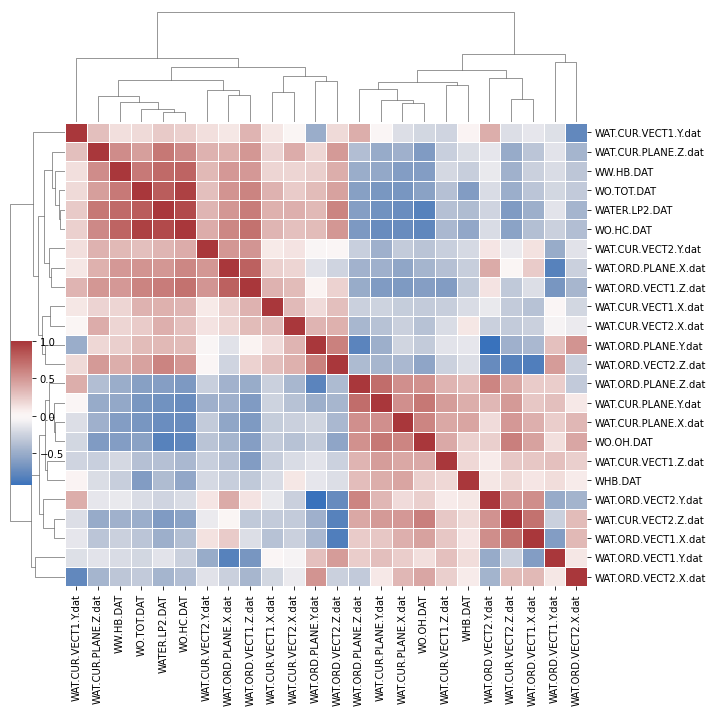

In [19]:
g = sns.clustermap(dados.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75)

Text(0, 0.5, 'WO.OH.DAT')

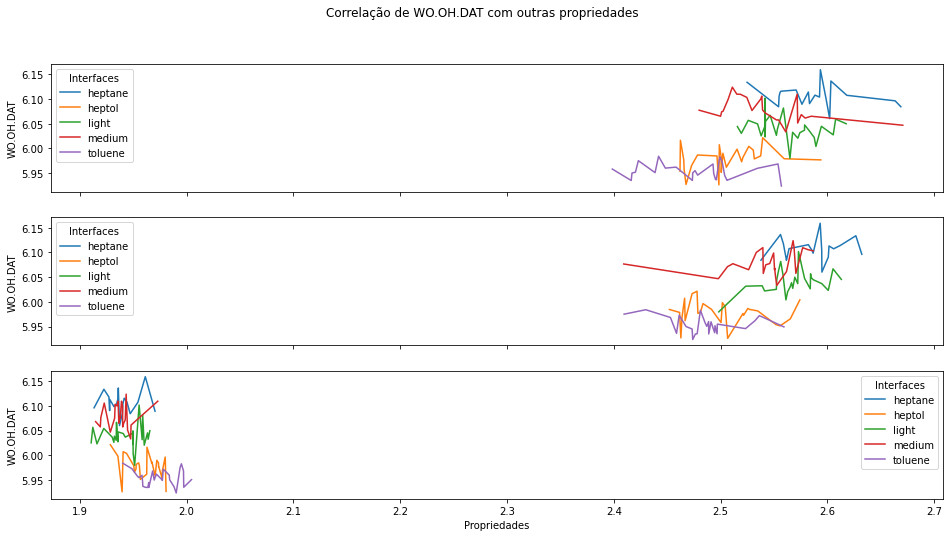

In [20]:
fig, axes = plt.subplots(3, sharex=True, figsize=(16,8))
fig.suptitle('Correlação de WO.OH.DAT com outras propriedades')

sns.lineplot(ax=axes[0], data=df_, x='WAT.CUR.PLANE.X.dat', y="WO.OH.DAT", hue="Interfaces")
sns.lineplot(ax=axes[1], data=df_, x='WAT.CUR.PLANE.Y.dat', y="WO.OH.DAT", hue="Interfaces")
sns.lineplot(ax=axes[2], data=df_, x='WAT.CUR.PLANE.Z.dat', y="WO.OH.DAT", hue="Interfaces")


plt.xlabel("Propriedades")
plt.ylabel("WO.OH.DAT")



<AxesSubplot:xlabel='WAT.CUR.PLANE.X.dat', ylabel='WO.OH.DAT'>

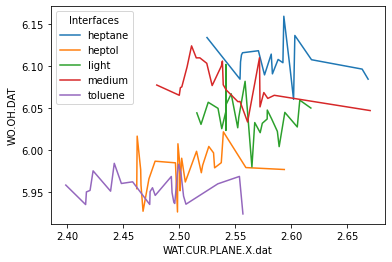

In [21]:
sns.lineplot(x="WAT.CUR.PLANE.X.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WAT.CUR.PLANE.Y.dat', ylabel='WO.OH.DAT'>

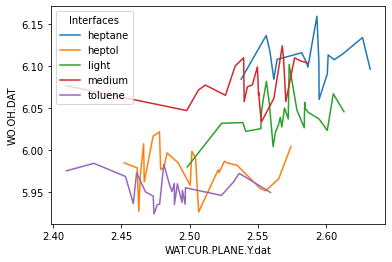

In [22]:
sns.lineplot(x="WAT.CUR.PLANE.Y.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WAT.CUR.PLANE.Z.dat', ylabel='WO.OH.DAT'>

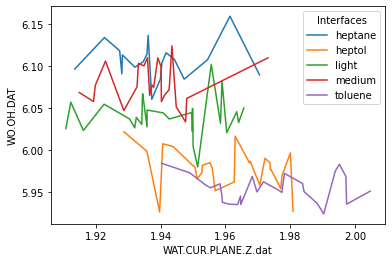

In [23]:
sns.lineplot(x="WAT.CUR.PLANE.Z.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

Text(0, 0.5, 'WO.OH.DAT')

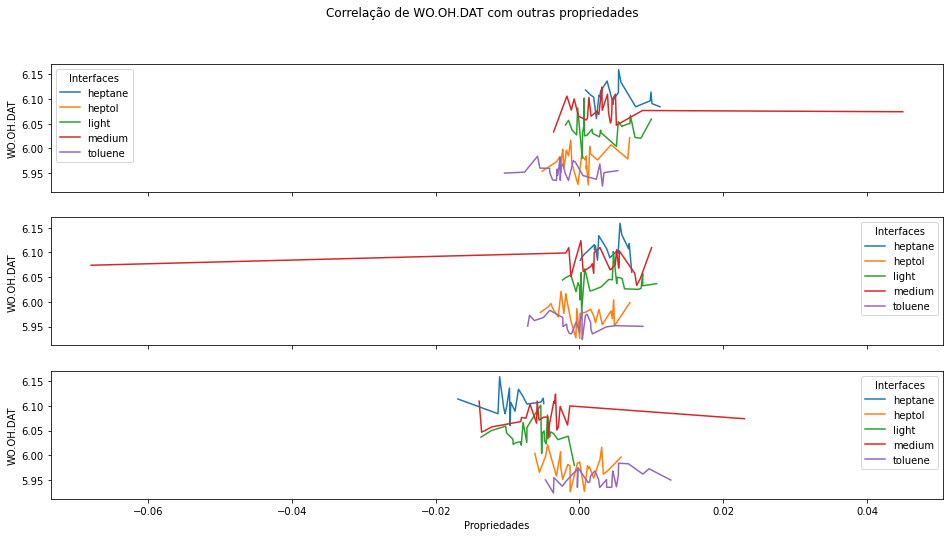

In [24]:
fig, axes = plt.subplots(3, sharex=True, figsize=(16,8))
fig.suptitle('Correlação de WO.OH.DAT com outras propriedades')

sns.lineplot(ax=axes[0], data=df_, x='WAT.ORD.VECT1.X.dat', y="WO.OH.DAT", hue="Interfaces")
sns.lineplot(ax=axes[1], data=df_, x='WAT.ORD.VECT1.Y.dat', y="WO.OH.DAT", hue="Interfaces")
sns.lineplot(ax=axes[2], data=df_, x='WAT.ORD.VECT1.Z.dat', y="WO.OH.DAT", hue="Interfaces")

plt.xlabel("Propriedades")
plt.ylabel("WO.OH.DAT")

<AxesSubplot:xlabel='WAT.ORD.VECT1.X.dat', ylabel='WO.OH.DAT'>

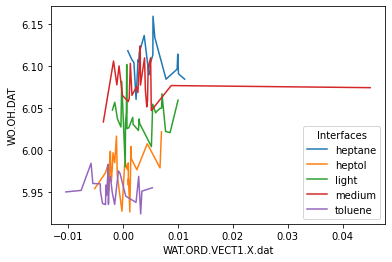

In [25]:
sns.lineplot(x="WAT.ORD.VECT1.X.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WAT.ORD.VECT1.Y.dat', ylabel='WO.OH.DAT'>

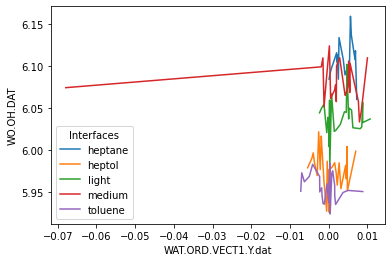

In [26]:
sns.lineplot(x="WAT.ORD.VECT1.Y.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WAT.ORD.VECT1.Z.dat', ylabel='WO.OH.DAT'>

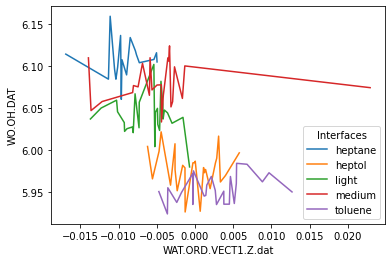

In [27]:
sns.lineplot(x="WAT.ORD.VECT1.Z.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WAT.CUR.PLANE.Z.dat', ylabel='WO.OH.DAT'>

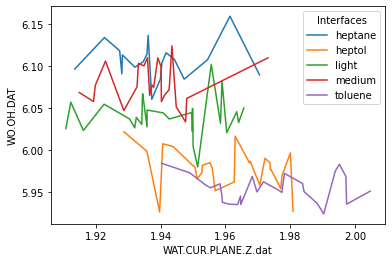

In [28]:
sns.lineplot(x="WAT.CUR.PLANE.Z.dat", y="WO.OH.DAT",
             hue="Interfaces",
             data=df_)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'heptane'),
  Text(1, 0, 'heptol'),
  Text(2, 0, 'light'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'toluene')])

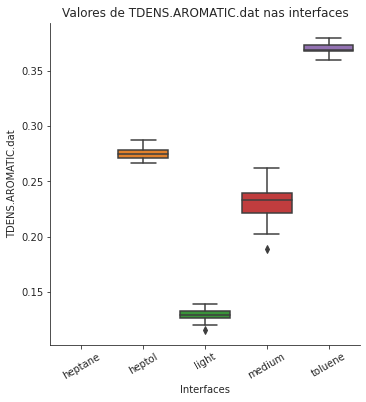

In [29]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = df_["Interfaces"] , y = "TDENS.AROMATIC.dat", data=df_, kind="box")
    g.set(xlabel ="Interfaces", ylabel = "TDENS.AROMATIC.dat", title ='Valores de TDENS.AROMATIC.dat nas interfaces')
    
plt.xticks(rotation="30")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'heptane'),
  Text(1, 0, 'heptol'),
  Text(2, 0, 'light'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'toluene')])

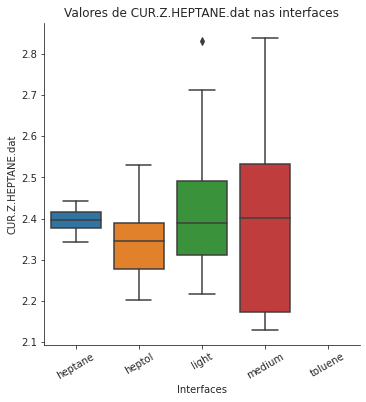

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = df_["Interfaces"] , y = "CUR.Z.HEPTANE.dat", data=df_, kind="box")
    g.set(xlabel ="Interfaces", ylabel = "CUR.Z.HEPTANE.dat", title ='Valores de CUR.Z.HEPTANE.dat nas interfaces')
    
plt.xticks(rotation="30")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'heptane'),
  Text(1, 0, 'heptol'),
  Text(2, 0, 'light'),
  Text(3, 0, 'medium'),
  Text(4, 0, 'toluene')])

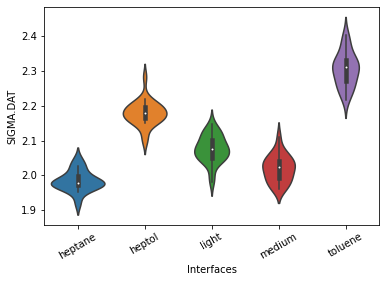

In [31]:
ax = sns.violinplot(x="Interfaces", y="SIGMA.DAT", data=df_)
plt.xticks(rotation="30")

<AxesSubplot:xlabel='SIGMA.DAT', ylabel='CUR.Z.HEPTANE.dat'>

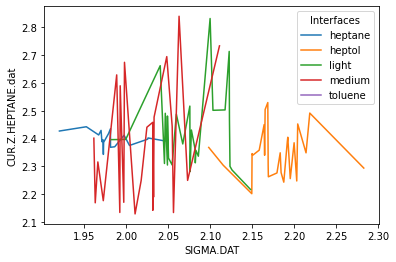

In [32]:
sns.lineplot(x="SIGMA.DAT", y="CUR.Z.HEPTANE.dat",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WWHB.DAT', ylabel='WO.TOT.DAT'>

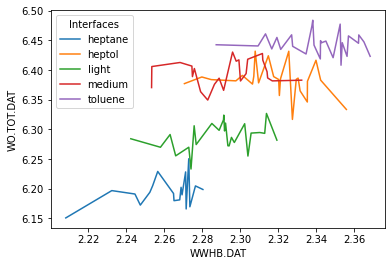

In [33]:
sns.lineplot(x="WWHB.DAT", y="WO.TOT.DAT",
             hue="Interfaces",
             data=df_)

<AxesSubplot:xlabel='WATER.LP2.DAT', ylabel='WO.TOT.DAT'>

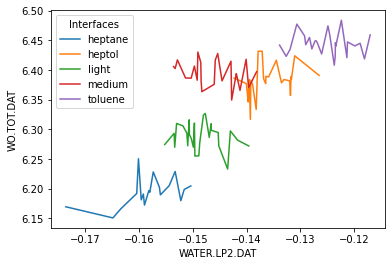

In [34]:
sns.lineplot(x="WATER.LP2.DAT", y="WO.TOT.DAT",
             hue="Interfaces",
             data=df_)

# 1. **Regressão Linear - modelo1**

In [35]:
d1 = df_['WO.TOT.DAT'].to_numpy()


In [36]:
d2 = df_['WO.HC.DAT'].to_numpy()
d2

array([4.426621 , 4.4882183, 4.4539461, 4.4561133, 4.4703679, 4.4699736,
       4.484704 , 4.4877372, 4.4782629, 4.4806433, 4.4988666, 4.4784055,
       4.4969926, 4.470685 , 4.50951  , 4.4680219, 4.5101132, 4.4824772,
       4.7879853, 4.7811742, 4.792058 , 4.7789459, 4.7678261, 4.8245506,
       4.7968273, 4.7935238, 4.7620339, 4.8125768, 4.8061194, 4.7527733,
       4.7916517, 4.7849722, 4.7892046, 4.7855005, 4.8047767, 4.8339663,
       4.7775745, 4.8171868, 4.7820797, 4.801609 , 4.8117442, 4.8044877,
       4.7997518, 4.6469269, 4.6236668, 4.6707048, 4.6510696, 4.6418872,
       4.6111636, 4.6495347, 4.636755 , 4.6026959, 4.6482062, 4.6033759,
       4.6226721, 4.6012044, 4.6011963, 4.6608963, 4.645762 , 4.6523943,
       4.646482 , 4.6730218, 4.6531949, 4.6456127, 4.6715541, 4.6281376,
       4.6482415, 4.6420355, 4.6358023, 4.7298555, 4.7147613, 4.7122078,
       4.697506 , 4.7221928, 4.7439065, 4.7366385, 4.7146997, 4.7107463,
       4.724988 , 4.7327743, 4.7087202, 4.7389708, 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

d1 = df_['WO.TOT.DAT'].to_numpy()

d2 = df_['WO.HC.DAT'].to_numpy()

X = d1.reshape(-1, 1)

y = d2.reshape(-1, 1)

# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [38]:
# para visualizar os coeficientes angular
a = model.coef_
a

array([[1.46605753]])

In [39]:
# para visualizar os coeficientes linear
b = model.intercept_
b

array([-4.58740176])

In [40]:
# R^2
r2 = model.score(X,y)
r2

0.8940893458017823

In [41]:
#Previsões para o mesmo conjunto passado
y_previsto = model.predict(X)

In [42]:
def aad():

    o = y

    p = y_previsto

    a = 0

    for i in range(len(o)):

        a += (np.abs(np.round(p[i],decimals = 2) - o[i])/o[i])

    return a/len(o)*100

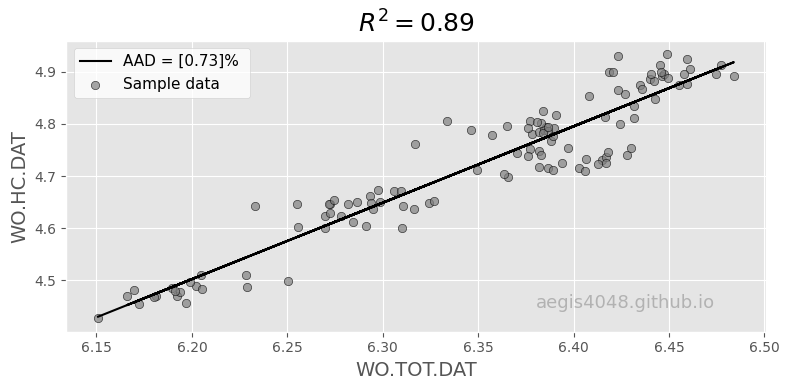

In [43]:
def graphic():

    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(X,y_previsto , color='k', label = ('AAD = ' + str(np.round(aad(),decimals = 2))+ '% '))
    ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
    ax.set_ylabel('WO.HC.DAT', fontsize=14)
    ax.set_xlabel('WO.TOT.DAT', fontsize=14)
    ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

    fig.tight_layout()

    plt.show()
    
graphic()

# 1. **Regressão linear - modelo2**

In [44]:
from sklearn.model_selection import train_test_split

dado1 = df_['WO.TOT.DAT'].to_numpy()

dado2 = df_['WO.HC.DAT'].to_numpy()

X1 = dado1.reshape(-1, 1)

y1 = dado2.reshape(-1, 1)

#Dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


#Treinando o algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
# para visualizar os coeficientes angular
a = regressor.coef_
a

array([[1.4717518]])

In [46]:
# para visualizar os coeficientes linear
b = regressor.intercept_
b

array([-4.62033381])

In [47]:
from sklearn.metrics import r2_score
from sklearn import metrics
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', regressor.score(X_train,y_train))

Mean Absolute Error: 0.03992918957461855
Mean Squared Error: 0.0023879707972208285
Root Mean Squared Error: 0.048866868093022174
R^2: 0.8999619586693057


In [48]:
def aad1():

    o = y_test

    p = y_pred

    a = 0

    for i in range(len(o)):

        a += (np.abs(np.round(p[i],decimals = 2) - o[i])/o[i])

    return a/len(o)*100

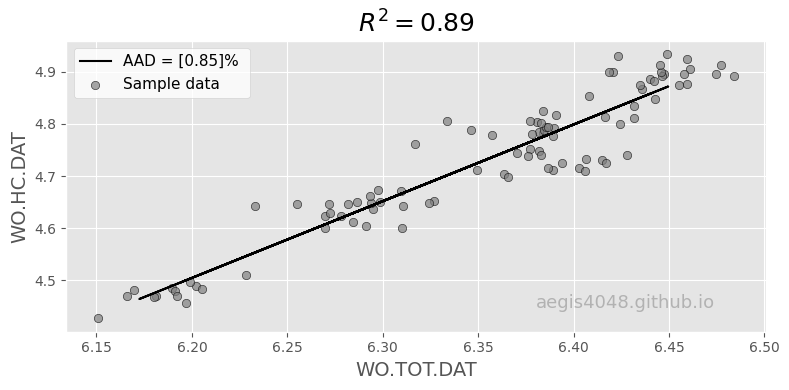

In [49]:
def graphic1():
    


    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(X_test, y_pred , color='k', label = ('AAD = ' + str(np.round(aad1(),decimals = 2))+ '% '))
    ax.scatter(X_train, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
    ax.set_ylabel('WO.HC.DAT', fontsize=14)
    ax.set_xlabel('WO.TOT.DAT', fontsize=14)
    ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
    ax.legend(facecolor='white', fontsize=11)
    ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

    fig.tight_layout()

    plt.show()
    
   
    
graphic1()

# **CURVA DE APRENDIZADO - Regressão de multiplas variáveis**

In [50]:
df_ = df_.fillna(0)

df_

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
0,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031587,0.031537,-0.063124,-0.164861,0.000000,4.426621,6.060110,6.150829,2.208128,2.208128
1,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034179,0.030508,-0.064686,-0.156211,0.000000,4.488218,6.117967,6.202394,2.268771,2.268771
2,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036342,0.030909,-0.067252,-0.158987,0.000000,4.453946,6.089230,6.172434,2.247331,2.247331
3,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027927,0.033264,-0.061190,-0.158171,0.000000,4.456113,6.107592,6.196848,2.232335,2.232335
4,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031986,0.033664,-0.065649,-0.159591,0.000000,4.470368,6.098434,6.181268,2.268069,2.268069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019837,0.016447,-0.036284,-0.121344,0.125589,4.899444,5.949969,6.420843,2.337303,2.348754
114,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020345,0.022312,-0.042657,-0.129216,0.124244,4.895954,5.968419,6.457587,2.343356,2.356827
115,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022663,0.024222,-0.046885,-0.123482,0.123096,4.900082,5.950404,6.445974,2.328440,2.342628
116,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022738,0.021149,-0.043887,-0.130654,0.128642,4.912274,5.972006,6.477390,2.340694,2.352475


In [51]:
from sklearn.model_selection import learning_curve

# 80% treino e 20% validação
train_sizes = [1, 10, 30, 50, 80, 94]

features = ['WAT.CUR.PLANE.X.dat', 'WAT.ORD.PLANE.X.dat', 'WAT.CUR.VECT1.X.dat', 'WO.OH.DAT']
target = "SIGMA.DAT"

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = df_[features],
    y = df_[target], train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

In [52]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.00070549 -0.08439914 -0.08439914 -0.08439914 -0.08439914]
 [-0.00109373 -0.11422373 -0.11419038 -0.11419038 -0.11419038]
 [-0.00136798 -0.07725739 -0.07728338 -0.07731078 -0.07731078]
 [-0.00246292 -0.05140969 -0.05200124 -0.05061478 -0.05037066]
 [-0.00277351 -0.04450954 -0.04508429 -0.04344994 -0.04420163]]

 ----------------------------------------------------------------------

Validation scores:

 [[-2.37237836e-01 -4.65927309e+00 -4.25639854e+00 -4.25127139e+00
  -5.30780543e+00]
 [-2.09078582e-01 -4.07012393e+01 -8.87072505e+00 -4.38289729e+01
  -7.89364848e+01]
 [-1.81342116e-01 -5.31499879e-02 -5.29509152e-02 -1.47289773e+00
  -3.77600707e-02]
 [-1.74521850e-01 -9.69251391e-03 -1.09060066e-02 -2.10234996e-01
  -4.21662231e-03]
 [-1.70836846e-01 -5.21647010e-03 -2.81608271e-03 -8.84960692e-02
  -4.02400293e-03]
 [-1.70725664e-01 -5.10880962e-03 -2.51545125e-03 -8.46146841e-02
  -8.63185850e-0

In [53]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1    -0.000000
10    0.067660
30    0.091578
50    0.062106
80    0.041372
94    0.036004
dtype: float64

 --------------------

Mean validation scores

 1      3.742397
10    34.509300
30     0.359620
50     0.081914
80     0.054278
94     0.054319
dtype: float64


(0.0, 30.0)

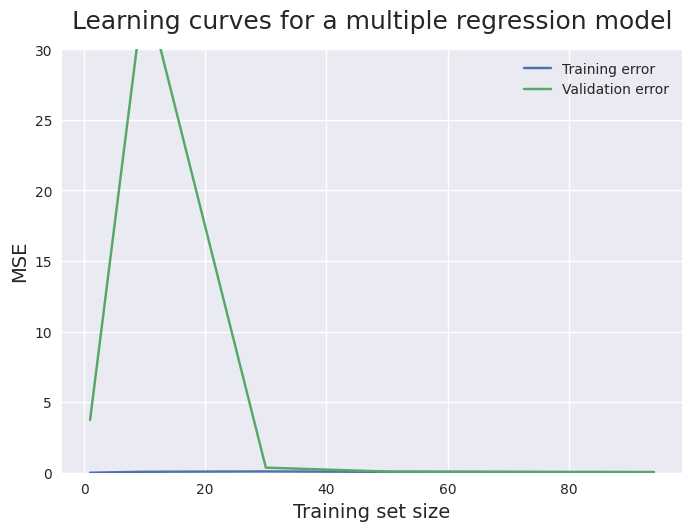

In [54]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a multiple regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,30)

# CONTINUAÇÃO 20/07/2021

Heptane

In [55]:
def strings_in_a_list(n, s):
    if n == 0:
        return []
    else:
        l = strings_in_a_list(n - 1, s)
        l.append(s)
        return l

In [56]:
heptane = pd.read_csv('../input/interfaces/heptane.dat',sep=";")
heptane.columns = ['P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4','IFT']

heptane_h = strings_in_a_list(len(heptane['P']) , 'heptane')

heptane['Type'] = heptane_h

heptane = heptane[['Type','IFT','P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4']]

heptane

,Type,IFT,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4
0,heptane,52.365135,100,0,0,0.684,1.00000,0.000000,0.000000,0.003623,0.000000,0.006417,0.000000
1,heptane,51.956841,100,0,0,0.684,3.50000,0.000000,0.000000,0.012246,0.000000,0.021695,0.000000
2,heptane,52.675557,100,0,0,0.684,5.00000,0.000000,0.000000,0.017295,0.000000,0.030638,0.000000
3,heptane,51.308806,100,0,0,0.684,1.00000,0.000000,0.005199,0.000000,0.000000,0.004720,0.000000
4,heptane,52.359999,100,0,0,0.684,3.50000,0.000000,0.018383,0.000000,0.000000,0.016691,0.000000
5,heptane,51.974630,100,0,0,0.684,5.00000,0.000000,0.026244,0.000000,0.000000,0.023828,0.000000
6,heptane,52.165269,100,0,0,0.684,1.00000,0.000000,0.000000,0.000000,0.002522,0.007368,0.000000
7,heptane,51.940947,100,0,0,0.684,3.50000,0.000000,0.000000,0.000000,0.008905,0.026018,0.000000
8,heptane,53.391183,100,0,0,0.684,5.00000,0.000000,0.000000,0.000000,0.012765,0.037296,0.000000
9,heptane,51.314808,100,0,0,0.684,1.00000,0.003949,0.000000,0.000000,0.000000,0.006101,0.000000


In [57]:
heptane_todos = df_[df_['Interfaces'] == "heptane"]

heptane_todos

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
0,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031587,0.031537,-0.063124,-0.164861,0.0,4.426621,6.060110,6.150829,2.208128,2.208128
1,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034179,0.030508,-0.064686,-0.156211,0.0,4.488218,6.117967,6.202394,2.268771,2.268771
2,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036342,0.030909,-0.067252,-0.158987,0.0,4.453946,6.089230,6.172434,2.247331,2.247331
3,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027927,0.033264,-0.061190,-0.158171,0.0,4.456113,6.107592,6.196848,2.232335,2.232335
4,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031986,0.033664,-0.065649,-0.159591,0.0,4.470368,6.098434,6.181268,2.268069,2.268069
5,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030143,0.033785,-0.063928,-0.160426,0.0,4.469974,6.103694,6.192042,2.264801,2.264801
6,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033782,0.037366,-0.071148,-0.156025,0.0,4.484704,6.096115,6.189701,2.269289,2.269289
7,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028515,0.034699,-0.063214,-0.153283,0.0,4.487737,6.136129,6.229097,2.256495,2.256495
8,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031252,0.032779,-0.064030,-0.157996,0.0,4.478263,6.107270,6.194014,2.252351,2.252351
9,heptane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035470,0.032981,-0.068451,-0.173618,0.0,4.480643,6.084144,6.169603,2.273401,2.273401


In [58]:
heptane_prop = heptane_todos.loc[:,['HEPTANE' in i for i in heptane_todos.columns]]

heptane_prop

,CUR.PLANE.X.CYCLOHEPTANE.dat,CUR.PLANE.Y.CYCLOHEPTANE.dat,CUR.PLANE.Z.CYCLOHEPTANE.dat,CUR.VECT1.X.CYCLOHEPTANE.dat,CUR.VECT1.Y.CYCLOHEPTANE.dat,CUR.VECT1.Z.CYCLOHEPTANE.dat,CUR.VECT2.X.CYCLOHEPTANE.dat,CUR.VECT2.Y.CYCLOHEPTANE.dat,CUR.VECT2.Z.CYCLOHEPTANE.dat,CUR.X.HEPTANE.dat,...,ORD.VECT1.X.CYCLOHEPTANE.dat,ORD.VECT1.Y.CYCLOHEPTANE.dat,ORD.VECT1.Z.CYCLOHEPTANE.dat,ORD.VECT2.X.CYCLOHEPTANE.dat,ORD.VECT2.Y.CYCLOHEPTANE.dat,ORD.VECT2.Z.CYCLOHEPTANE.dat,ORD.X.HEPTANE.dat,ORD.Y.HEPTANE.dat,ORD.Z.HEPTANE.dat,TORT.HEPTANE.dat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.137300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024563,0.020440,-0.045003,1.631274
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.191633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.019146,0.023775,-0.042921,1.623718
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.160726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024107,0.015127,-0.039233,1.637325
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.178340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.018860,0.020266,-0.039127,1.621576
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.169341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020752,0.022482,-0.043233,1.628830
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.165294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.022575,0.020770,-0.043345,1.626675
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.124097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027021,0.015453,-0.042474,1.621217
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.182928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.037759,0.013802,-0.051560,1.628378
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.183031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.019501,0.026415,-0.045916,1.630920
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.163515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021981,0.018165,-0.040146,1.624667


Curtose do heptano x salinidade

In [59]:
heptane_curtose = heptane_prop.loc[0:,['CUR' in i for i in heptane_prop.columns]]

heptane_curtose

,CUR.PLANE.X.CYCLOHEPTANE.dat,CUR.PLANE.Y.CYCLOHEPTANE.dat,CUR.PLANE.Z.CYCLOHEPTANE.dat,CUR.VECT1.X.CYCLOHEPTANE.dat,CUR.VECT1.Y.CYCLOHEPTANE.dat,CUR.VECT1.Z.CYCLOHEPTANE.dat,CUR.VECT2.X.CYCLOHEPTANE.dat,CUR.VECT2.Y.CYCLOHEPTANE.dat,CUR.VECT2.Z.CYCLOHEPTANE.dat,CUR.X.HEPTANE.dat,CUR.Y.HEPTANE.dat,CUR.Z.HEPTANE.dat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.137300,2.179734,2.369444
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.191633,2.160977,2.418518
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.160726,2.131769,2.429543
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.178340,2.201989,2.427313
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.169341,2.171307,2.413168
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.165294,2.169037,2.389087
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.124097,2.197253,2.386609
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.182928,2.199271,2.435533
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.183031,2.139823,2.343402
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.163515,2.249026,2.402413


In [60]:
heptane_curtose.shape

(18, 12)

In [61]:
salinidade_heptane = heptane.loc[:2,['Salinity' in i for i in heptane.columns]]

salinidade_heptane

,Salinity
0,1.0
1,3.5
2,5.0


Tortuosidade do heptano

In [62]:
heptane_tort = heptane_prop.loc[0:,['TORT' in i for i in heptane_prop.columns]]

heptane_tort

,TORT.HEPTANE.dat
0,1.631274
1,1.623718
2,1.637325
3,1.621576
4,1.628830
5,1.626675
6,1.621217
7,1.628378
8,1.630920
9,1.624667


Entropia do heptano

In [63]:
heptane_ent = heptane_prop.loc[0:,['ENT' in i for i in heptane_prop.columns]]

heptane_ent

,ENT.PLANE.X.CYCLOHEPTANE.DAT,ENT.PLANE.Y.CYCLOHEPTANE.DAT,ENT.PLANE.Z.CYCLOHEPTANE.DAT,ENT.VECT1.X.CYCLOHEPTANE.DAT,ENT.VECT1.Y.CYCLOHEPTANE.DAT,ENT.VECT1.Z.CYCLOHEPTANE.DAT,ENT.VECT2.X.CYCLOHEPTANE.DAT,ENT.VECT2.Y.CYCLOHEPTANE.DAT,ENT.VECT2.Z.CYCLOHEPTANE.DAT,ENT.X.HEPTANE.dat,ENT.Y.HEPTANE.dat,ENT.Z.HEPTANE.dat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.964516,3.957108,3.900906
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.958213,3.961583,3.903476
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960695,3.955537,3.906368
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.956316,3.957802,3.904679
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.964441,3.966774,3.906974
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.965623,3.965486,3.907362
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.965155,3.954514,3.903789
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.970900,3.956984,3.891000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959582,3.964061,3.895804
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.958839,3.957872,3.905184


In [64]:
heptane_ent.shape

(18, 12)

Heptol

In [65]:
heptol = pd.read_csv('../input/interfaces/heptol.dat',sep=";")
heptol.columns = ['P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4','IFT']

heptol_h = strings_in_a_list(len(heptol['P']) , 'heptol')

heptol['Type'] = heptol_h

heptol = heptol[['Type','IFT','P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4']]

heptol

,Type,IFT,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4
0,heptol,44.643922,50,0,50,0.7755,1.00000,0.000000,0.000000,0.003623,0.000000,0.006417,0.000000
1,heptol,46.735414,50,0,50,0.7755,3.50000,0.000000,0.000000,0.012246,0.000000,0.021695,0.000000
2,heptol,46.021848,50,0,50,0.7755,5.00000,0.000000,0.000000,0.017295,0.000000,0.030638,0.000000
3,heptol,44.643929,50,0,50,0.7755,1.00000,0.000000,0.005199,0.000000,0.000000,0.004720,0.000000
4,heptol,45.054404,50,0,50,0.7755,3.50000,0.000000,0.018383,0.000000,0.000000,0.016691,0.000000
5,heptol,46.424634,50,0,50,0.7755,5.00000,0.000000,0.026244,0.000000,0.000000,0.023828,0.000000
6,heptol,45.101271,50,0,50,0.7755,1.00000,0.000000,0.000000,0.000000,0.002522,0.007368,0.000000
7,heptol,45.393827,50,0,50,0.7755,3.50000,0.000000,0.000000,0.000000,0.008905,0.026018,0.000000
8,heptol,46.118832,50,0,50,0.7755,5.00000,0.000000,0.000000,0.000000,0.012765,0.037296,0.000000
9,heptol,45.148954,50,0,50,0.7755,1.00000,0.003949,0.000000,0.000000,0.000000,0.006101,0.000000


In [66]:
heptol = df_[df_['Interfaces'] == "heptol"]

heptol

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
18,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022653,0.025205,-0.047858,-0.139695,0.190694,4.787985,5.958056,6.346167,2.324491,2.335190
19,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020729,0.026227,-0.046956,-0.133509,0.189774,4.781174,5.953879,6.378427,2.298617,2.309559
20,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024155,0.026093,-0.050248,-0.136407,0.186442,4.792058,5.986538,6.389451,2.297780,2.307035
21,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019909,0.027330,-0.047239,-0.131837,0.186623,4.778946,5.978941,6.357142,2.311427,2.320489
22,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022178,0.026159,-0.048337,-0.135909,0.184110,4.767826,5.961817,6.388316,2.267651,2.279701
23,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023307,0.022780,-0.046087,-0.139511,0.180029,4.824551,5.978617,6.383880,2.272384,2.284669
24,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022817,0.028027,-0.050844,-0.139654,0.188118,4.796827,5.965535,6.364931,2.321198,2.331403
25,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022651,0.029209,-0.051860,-0.136836,0.198217,4.793524,5.976399,6.385319,2.309563,2.321088
26,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027413,0.025002,-0.052415,-0.139296,0.185475,4.762034,5.926110,6.316820,2.316608,2.327351
27,heptol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023900,0.026432,-0.050332,-0.134466,0.190795,4.812577,6.016363,6.416505,2.328962,2.339745


Light

In [67]:
light = pd.read_csv('../input/interfaces/light.dat',sep=";")
light.columns = ['P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4','IFT']

light_h = strings_in_a_list(len(light['P']) , 'light')

light['Type'] = light_h

light = light[['Type','IFT','P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4']]

light

,Type,IFT,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4
0,light,48.664530,61.88,21,17.12,0.805,1.00000,0.000000,0.000000,0.003623,0.000000,0.006417,0.000000
1,light,49.531626,61.88,21,17.12,0.805,3.50000,0.000000,0.000000,0.012246,0.000000,0.021695,0.000000
2,light,49.599615,61.88,21,17.12,0.805,5.00000,0.000000,0.000000,0.017295,0.000000,0.030638,0.000000
3,light,48.117123,61.88,21,17.12,0.805,1.00000,0.000000,0.005199,0.000000,0.000000,0.004720,0.000000
4,light,49.148104,61.88,21,17.12,0.805,3.50000,0.000000,0.018383,0.000000,0.000000,0.016691,0.000000
5,light,49.738147,61.88,21,17.12,0.805,5.00000,0.000000,0.026244,0.000000,0.000000,0.023828,0.000000
6,light,48.802938,61.88,21,17.12,0.805,1.00000,0.000000,0.000000,0.000000,0.002522,0.007368,0.000000
7,light,49.337445,61.88,21,17.12,0.805,3.50000,0.000000,0.000000,0.000000,0.008905,0.026018,0.000000
8,light,51.027613,61.88,21,17.12,0.805,5.00000,0.000000,0.000000,0.000000,0.012765,0.037296,0.000000
9,light,49.990126,61.88,21,17.12,0.805,1.00000,0.003949,0.000000,0.000000,0.000000,0.006101,0.000000


In [68]:
light_todos = df_[df_['Interfaces'] == "light"]

light_todos

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
43,light,0.0,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031674,0.026217,-0.057890,-0.145168,45.178688,4.646927,6.022011,6.272209,2.289548,2.294051
44,light,0.0,0.033304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027795,0.033918,-0.061712,-0.148706,40.702763,4.623667,6.027275,6.277922,2.290529,2.296788
45,light,0.0,0.021152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035774,0.028516,-0.064290,-0.151850,0.263646,4.670705,6.054359,6.306112,2.270072,2.275658
46,light,0.0,0.031607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031424,0.027279,-0.058703,-0.146573,45.259319,4.651070,6.044593,6.298447,2.283563,2.288789
47,light,0.0,0.031196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024300,0.028268,-0.052568,-0.143521,0.314941,4.641887,5.979707,6.233214,2.267634,2.273994
48,light,0.0,0.026525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026005,0.033094,-0.059099,-0.150269,44.562511,4.611164,6.031670,6.284224,2.237038,2.242326
49,light,0.0,0.016737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027172,0.031736,-0.058908,-0.146939,47.513233,4.649535,6.032485,6.286529,2.289493,2.295283
50,light,0.0,0.041006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027827,0.031778,-0.059605,-0.145282,0.273584,4.636755,6.066714,6.294734,2.305694,2.310196
51,light,0.0,0.025964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029067,0.030725,-0.059792,-0.148881,44.563519,4.602696,6.003861,6.255445,2.260751,2.265945
52,light,0.0,0.011315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029984,0.030826,-0.060810,-0.148026,45.918709,4.648206,6.059136,6.324070,2.285278,2.291244


hexane


In [69]:
hexane_prop = light_todos.loc[:,['HEXANE' in i for i in light_todos.columns]]

hexane_prop.shape

(26, 39)

In [70]:
hexane_curt = hexane_prop.loc[:,['CUR' in i for i in hexane_prop.columns]]

hexane_curt.shape

(26, 12)

In [71]:
hexane_tort = hexane_prop.loc[:,['TORT' in i for i in hexane_prop.columns]]

hexane_tort.shape

(26, 1)

In [72]:
hexane_ent = hexane_prop.loc[:,['ENT' in i for i in hexane_prop.columns]]

hexane_ent.shape

(26, 12)

Octane

In [73]:
oct_prop = light_todos.loc[:,['OCTANE' in i for i in light_todos.columns]]

oct_prop.shape

(26, 39)

In [74]:
oct_curt = oct_prop.loc[:,['CUR' in i for i in oct_prop.columns]]

oct_curt.shape

(26, 12)

In [75]:
oct_tort = oct_prop.loc[:,['TORT' in i for i in oct_prop.columns]]

oct_tort.shape

(26, 1)

In [76]:
oct_ent = oct_prop.loc[:,['ENT' in i for i in oct_prop.columns]]

oct_ent.shape

(26, 12)

Nonane

In [77]:
non_prop = light_todos.loc[:,['NONANE' in i for i in light_todos.columns]]

non_prop.shape

(26, 11)

In [78]:
non_curt = non_prop.loc[:,['CUR' in i for i in non_prop.columns]]

non_curt.shape

(26, 3)

In [79]:
non_tort = non_prop.loc[:,['TORT' in i for i in non_prop.columns]]

non_tort.shape

(26, 1)

In [80]:
non_ent = non_prop.loc[:,['ENT' in i for i in non_prop.columns]]

non_ent.shape

(26, 3)

Benzene

In [81]:
ben_prop = light_todos.loc[:,['BENZENE' in i for i in light_todos.columns]]

ben_prop.shape

(26, 115)

In [82]:
ben_curt = ben_prop.loc[:,['CUR' in i for i in ben_prop.columns]]

ben_curt.shape

(26, 36)

In [83]:
ben_tort = ben_prop.loc[:,['TORT' in i for i in ben_prop.columns]]

ben_tort.shape

(26, 0)

In [84]:
ben_ent = ben_prop.loc[:,['ENT' in i for i in ben_prop.columns]]

ben_ent.shape

(26, 36)

Medium

In [85]:
medium = pd.read_csv('../input/interfaces/medium.dat',sep=";")
medium.columns = ['P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4','IFT']

medium_h = strings_in_a_list(len(medium['P']) , 'medium')

medium['Type'] = medium_h

medium = medium[['Type','IFT','P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4']]

medium

,Type,IFT,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4
0,medium,49.345962,69.082408,3.857393,27.060199,0.8465,1.00000,0.000000,0.000000,0.003623,0.000000,0.006417,0.000000
1,medium,51.056444,69.082408,3.857393,27.060199,0.8465,3.50000,0.000000,0.000000,0.012246,0.000000,0.021695,0.000000
2,medium,51.707727,69.082408,3.857393,27.060199,0.8465,5.00000,0.000000,0.000000,0.017295,0.000000,0.030638,0.000000
3,medium,48.780222,69.082408,3.857393,27.060199,0.8465,1.00000,0.000000,0.005199,0.000000,0.000000,0.004720,0.000000
4,medium,50.575662,69.082408,3.857393,27.060199,0.8465,3.50000,0.000000,0.018383,0.000000,0.000000,0.016691,0.000000
5,medium,50.938431,69.082408,3.857393,27.060199,0.8465,5.00000,0.000000,0.026244,0.000000,0.000000,0.023828,0.000000
6,medium,48.527394,69.082408,3.857393,27.060199,0.8465,1.00000,0.000000,0.000000,0.000000,0.002522,0.007368,0.000000
7,medium,51.434077,69.082408,3.857393,27.060199,0.8465,3.50000,0.000000,0.000000,0.000000,0.008905,0.026018,0.000000
8,medium,52.712443,69.082408,3.857393,27.060199,0.8465,5.00000,0.000000,0.000000,0.000000,0.012765,0.037296,0.000000
9,medium,48.935368,69.082408,3.857393,27.060199,0.8465,1.00000,0.003949,0.000000,0.000000,0.000000,0.006101,0.000000


In [86]:
medium = df_[df_['Interfaces'] == "medium"]

medium

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
69,medium,0.016622,0.023895,0.027160,0.000000,0.026824,0.000000,0.000000,0.035877,0.024563,...,0.024258,0.037754,-0.062011,-0.142900,0.082089,4.729856,6.109482,6.414897,2.292084,2.297777
70,medium,0.026436,0.045742,0.029366,0.000000,0.023060,0.000000,0.000000,0.000000,0.024810,...,0.111171,-0.056196,-0.054974,-0.150306,0.091033,4.714761,6.076522,6.386316,2.281911,2.288786
71,medium,0.000000,0.044226,0.019198,0.000000,0.035914,0.026626,0.000000,0.000000,0.000000,...,0.029826,0.034687,-0.064513,-0.141784,0.113289,4.712208,6.068197,6.388973,2.267892,2.274757
72,medium,0.034577,0.022130,0.031555,0.000000,0.032407,0.000000,0.000000,0.006449,0.009838,...,0.025490,0.032937,-0.058428,-0.141227,0.076076,4.697506,6.064966,6.365808,2.285232,2.291157
73,medium,0.020833,0.021071,0.016743,0.000000,0.024361,0.000000,0.000000,0.004817,0.023844,...,0.027165,0.027544,-0.054709,-0.148514,0.080061,4.722193,6.109652,6.412737,2.262359,2.268242
74,medium,0.015088,0.022678,0.026221,0.000000,0.046954,0.000000,0.000000,0.039374,0.001877,...,0.025543,0.026261,-0.051804,-0.139625,0.094919,4.743906,6.033215,6.370450,2.247088,2.253259
75,medium,0.000000,0.007306,0.028284,0.000000,0.020477,0.000000,0.000000,0.036440,0.038754,...,0.022186,0.030661,-0.052846,-0.145823,0.088642,4.736638,6.099890,6.416813,2.304817,2.311767
76,medium,0.000000,0.016769,0.015703,0.000000,0.012039,0.000000,0.000000,0.000000,0.000000,...,0.026747,0.031796,-0.058544,-0.153277,0.073830,4.714700,6.105671,6.402560,2.270098,2.275767
77,medium,0.000000,0.018868,0.031042,0.000000,0.025364,0.000000,0.000000,0.000000,0.000000,...,0.030218,0.026538,-0.056756,-0.142780,0.081244,4.710746,6.051155,6.349443,2.276158,2.282803
78,medium,0.000000,0.008197,0.025323,0.000000,0.020495,0.060958,0.000000,0.019521,0.043860,...,0.028353,0.028062,-0.056415,-0.141912,0.085725,4.724988,6.074983,6.393987,2.295035,2.302988


Tolune

In [87]:
toluene = pd.read_csv('../input/interfaces/toluene.dat',sep=";")
toluene.columns = ['P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4','IFT']

toluene_h = strings_in_a_list(len(toluene['P']) , 'toluene')

toluene['Type'] = toluene_h

toluene = toluene[['Type','IFT','P','N','A','DensityOil','Salinity','Na','K','Ca','Mg','Cl','SO4']]


toluene

,Type,IFT,P,N,A,DensityOil,Salinity,Na,K,Ca,Mg,Cl,SO4
0,toluene,40.482651,0,0,100,0.867,1.00000,0.000000,0.000000,0.003623,0.000000,0.006417,0.000000
1,toluene,41.832945,0,0,100,0.867,3.50000,0.000000,0.000000,0.012246,0.000000,0.021695,0.000000
2,toluene,42.528222,0,0,100,0.867,5.00000,0.000000,0.000000,0.017295,0.000000,0.030638,0.000000
3,toluene,40.107735,0,0,100,0.867,1.00000,0.000000,0.005199,0.000000,0.000000,0.004720,0.000000
4,toluene,41.280174,0,0,100,0.867,3.50000,0.000000,0.018383,0.000000,0.000000,0.016691,0.000000
5,toluene,42.025686,0,0,100,0.867,5.00000,0.000000,0.026244,0.000000,0.000000,0.023828,0.000000
6,toluene,40.364121,0,0,100,0.867,1.00000,0.000000,0.000000,0.000000,0.002522,0.007368,0.000000
7,toluene,42.110388,0,0,100,0.867,3.50000,0.000000,0.000000,0.000000,0.008905,0.026018,0.000000
8,toluene,42.529761,0,0,100,0.867,5.00000,0.000000,0.000000,0.000000,0.012765,0.037296,0.000000
9,toluene,41.408181,0,0,100,0.867,1.00000,0.003949,0.000000,0.000000,0.000000,0.006101,0.000000


In [88]:
toluene_todos = df_[df_['Interfaces'] == "toluene"]

toluene_todos

,Interfaces,AD.WHB.ANTHRACENE.DAT,AD.WHB.BENZENE.DAT,AD.WHB.BENZOPYRENE.DAT,AD.WHB.M-XYLENE.DAT,AD.WHB.NAPHTHALENE.DAT,AD.WHB.O-XYLENE.DAT,AD.WHB.P-XYLENE.DAT,AD.WHB.PHENANTHERENE.DAT,AD.WHB.PYRENE.DAT,...,WAT.ORD.VECT2.X.dat,WAT.ORD.VECT2.Y.dat,WAT.ORD.VECT2.Z.dat,WATER.LP2.DAT,WHB.DAT,WO.HC.DAT,WO.OH.DAT,WO.TOT.DAT,WW.HB.DAT,WWHB.DAT
92,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029535,0.025058,-0.054592,-0.126851,0.127525,4.890967,5.954927,6.446123,2.339513,2.353561
93,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018837,0.024874,-0.043711,-0.118077,0.123142,4.899332,5.951796,6.418732,2.329683,2.342029
94,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025683,0.021759,-0.047442,-0.126045,0.125083,4.857066,5.935063,6.427061,2.319404,2.334528
95,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022547,0.020246,-0.042793,-0.123697,0.130075,4.854423,5.936219,6.408175,2.339563,2.352924
96,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031567,0.016756,-0.048322,-0.125205,0.123152,4.905026,5.984006,6.460952,2.300011,2.313194
97,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022897,0.021894,-0.044791,-0.129002,0.123715,4.846933,5.972769,6.442652,2.273640,2.287259
98,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026644,0.017922,-0.044566,-0.124869,0.126233,4.895629,5.982876,6.474441,2.323254,2.337621
99,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022121,0.026664,-0.048785,-0.124536,0.121824,4.876006,5.958127,6.459381,2.313830,2.326942
100,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019957,0.025236,-0.045193,-0.128295,0.120769,4.874531,5.935406,6.454946,2.305724,2.319194
101,toluene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022497,0.028078,-0.050576,-0.123422,0.126580,4.885713,5.949268,6.440019,2.313476,2.327483


In [89]:
toluene_prop = toluene_todos.loc[:,['TOLUENE' in i for i in toluene_todos.columns]]

toluene_prop.shape


(26, 30)

In [90]:
toluene_curt = toluene_prop.loc[:,['CUR' in i for i in toluene_prop.columns]]

toluene_curt.shape

(26, 9)

In [91]:
toluene_tort = toluene_prop.loc[:,['TORT' in i for i in toluene_prop.columns]]

toluene_tort.shape

(26, 0)

In [92]:
toluene_ent = toluene_prop.loc[:,['ENT' in i for i in toluene_prop.columns]]

toluene_ent.shape

(26, 9)